In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns


# Any results you write to the current directory are saved as output.

['test.csv', 'GCP-Coupons-Instructions.rtf', 'train.csv', 'sample_submission.csv']


In [2]:
df=pd.read_csv("../input/train.csv",nrows = 1_000_000)

In [3]:
df.drop(df[df.fare_amount < 0].index, inplace=True)

> ### How is the fare price distributed?
* We will use this information to infer about types of trips preferred by riders.

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)>

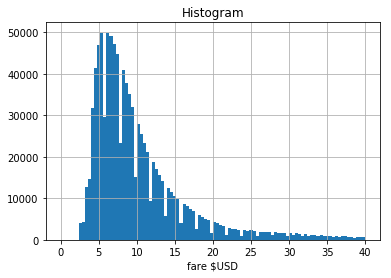

In [4]:
df.fare_amount.hist(bins=100,range=(df.fare_amount.min(),40))
plt.xlabel('fare $USD')
plt.title('Histogram');
plt.hist

In [5]:
df["pickup_datetime"] = pd.to_datetime(df['pickup_datetime'])

In [6]:
df["day_of_week"] = df.pickup_datetime.dt.dayofweek
df["month"] = df.pickup_datetime.dt.month
df["month_name"] = df.pickup_datetime.dt.month_name()
df["hour"] = df.pickup_datetime.dt.hour

In [7]:
df["dayname"] = df.pickup_datetime.dt.day_name()



### How does the the number of trips taken differ by month?
* We will use this information infer about seasonality in the data

Text(0.5, 1.0, 'Number of trips by month')

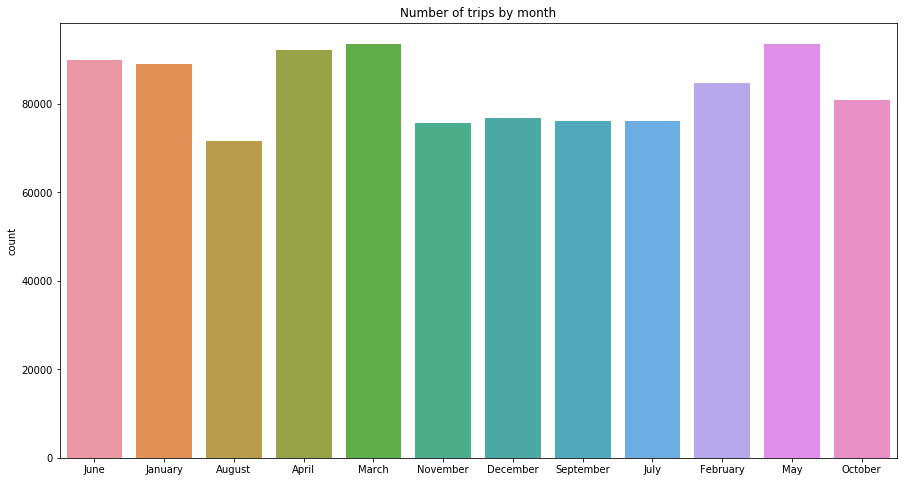

In [8]:
plt.figure(figsize=(15,8))
sns.countplot(x='month_name',data=df)
plt.xlabel('')
plt.title('Number of trips by month')

### How does the the number of trips taken differ by day of the week?
* We will use this information to see the day of the week with least number of rides

Text(0.5, 1.0, 'Number of trips by day of week')

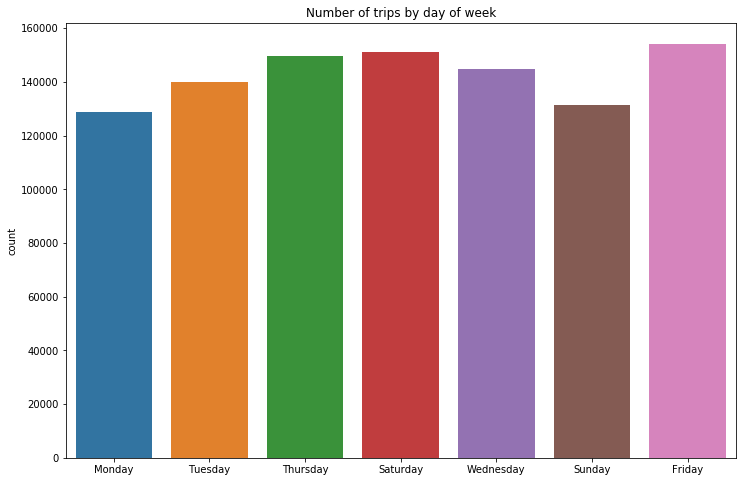

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(x='dayname',data=df)
plt.xlabel('')
plt.title('Number of trips by day of week')

### How does the the number of trips taken differ by hour?


Text(0.5, 1.0, 'Number of trips by hour')

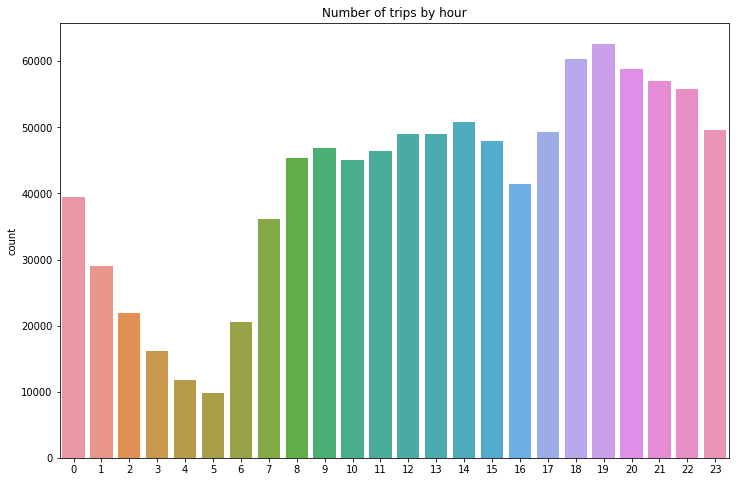

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x='hour',data=df)
plt.xlabel('')
plt.title('Number of trips by hour')

In [11]:
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])


In [12]:
BB = (-74.5, -72.8, 40.5, 41.8)
print('Old size: %d' % len(df))
df = df[select_within_boundingbox(df, BB)]
print('New size: %d' % len(df))

Old size: 999962
New size: 979018


In [13]:
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')
BB_zoom = (-74.3, -73.7, 40.5, 40.9)


In [14]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

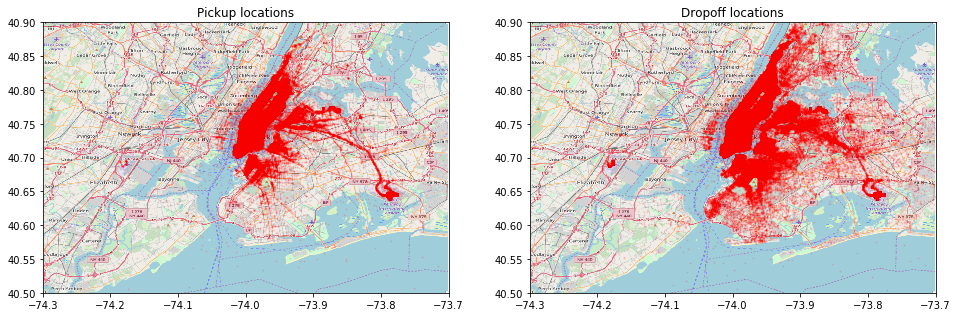

In [15]:
plot_on_map(df, BB_zoom, nyc_map_zoom, s=1, alpha=0.1)


### Here we have an ugly graph which will later show if rides taken in the day, afternoon, evening and night change with the day of week.

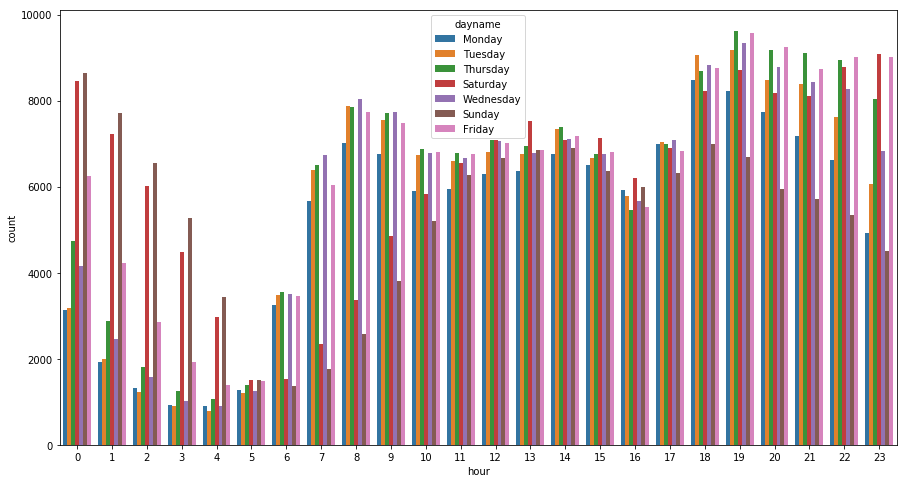

In [16]:
plt.figure(figsize=(15,8))

sns.countplot(x="hour", hue="dayname", data=df)